# 2) Data Wrangling II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\darsh\AppData\Local\Temp\ipykernel_25844\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Create an “Academic performance” dataset of students and perform the following operations using Python.

In [2]:
data = {'Name': ['Ram', 'Jayesh', 'Sakshi', 'Kishor','Shruti','Meet','Lavanya'],
        'Surname': ['Yadav','Patil','joshi','Sharma','Bhamre','Gunjal','Joshi'],
        'address': ['Pune',np.nan,'Mumbai','Delhi','Nashik','Tokyo','Agra'],
        'Age': [20, 21, 19, 18,22,21,22],
        'Maths': [76,np.nan,87,45,54,57,67],
        'English': [67,47,100,81,64,78,-99],
        'Science': [np.nan,75,59,43,35,46,56],
        'Hindi': [64,76,400,58,49,79,np.nan],
        'Sanskrit': [46,56,np.nan,89,56,98,47],
        'SST': [56,47,84,np.nan,78,26,75]}
df=pd.DataFrame(data)
df

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Ram,Yadav,Pune,20,76.0,67,NaN,64.0,46.0,56.0
1,Jayesh,Patil,NaN,21,NaN,47,75.0,76.0,56.0,47.0
2,Sakshi,joshi,Mumbai,19,87.0,100,59.0,400.0,NaN,84.0
3,Kishor,Sharma,Delhi,18,45.0,81,43.0,58.0,89.0,NaN
4,Shruti,Bhamre,Nashik,22,54.0,64,35.0,49.0,56.0,78.0
5,Meet,Gunjal,Tokyo,21,57.0,78,46.0,79.0,98.0,26.0
6,Lavanya,Joshi,Agra,22,67.0,-99,56.0,NaN,47.0,75.0


#### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [3]:
null_mask = df.isnull().any(axis=1)
null_row = df[null_mask]
null_row

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Ram,Yadav,Pune,20,76.0,67,NaN,64.0,46.0,56.0
1,Jayesh,Patil,NaN,21,NaN,47,75.0,76.0,56.0,47.0
2,Sakshi,joshi,Mumbai,19,87.0,100,59.0,400.0,NaN,84.0
3,Kishor,Sharma,Delhi,18,45.0,81,43.0,58.0,89.0,NaN
6,Lavanya,Joshi,Agra,22,67.0,-99,56.0,NaN,47.0,75.0


In [4]:
mean_maths = df["Maths"].mean()

In [5]:
df['address'] = df['address'].fillna(method='ffill')
df['Maths']=df['Maths'].fillna(df["Maths"].mean())
df['English']=df['English'].fillna(df["English"].mean())
df['Science']=df['Science'].fillna(df["Science"].mean())
df['Hindi']=df['Hindi'].fillna(df["Hindi"].mean())
df['Sanskrit']=df['Sanskrit'].fillna(df["Sanskrit"].mean())
df['SST']=df['SST'].fillna(df["SST"].mean())
df

C:\Users\darsh\AppData\Local\Temp\ipykernel_25844\3773181544.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['address'] = df['address'].fillna(method='ffill')


,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Ram,Yadav,Pune,20,76.000000,67,52.333333,64.0,46.000000,56.0
1,Jayesh,Patil,Pune,21,64.333333,47,75.000000,76.0,56.000000,47.0
2,Sakshi,joshi,Mumbai,19,87.000000,100,59.000000,400.0,65.333333,84.0
3,Kishor,Sharma,Delhi,18,45.000000,81,43.000000,58.0,89.000000,61.0
4,Shruti,Bhamre,Nashik,22,54.000000,64,35.000000,49.0,56.000000,78.0
5,Meet,Gunjal,Tokyo,21,57.000000,78,46.000000,79.0,98.000000,26.0
6,Lavanya,Joshi,Agra,22,67.000000,-99,56.000000,121.0,47.000000,75.0


#### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

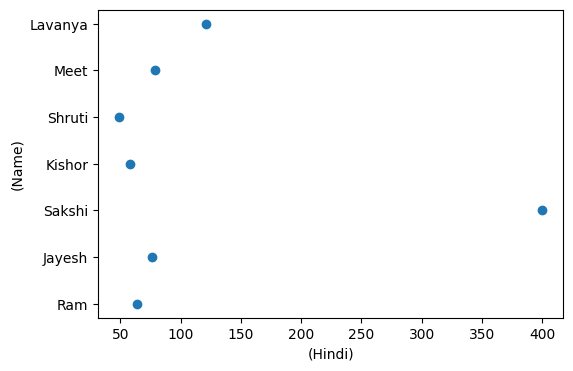

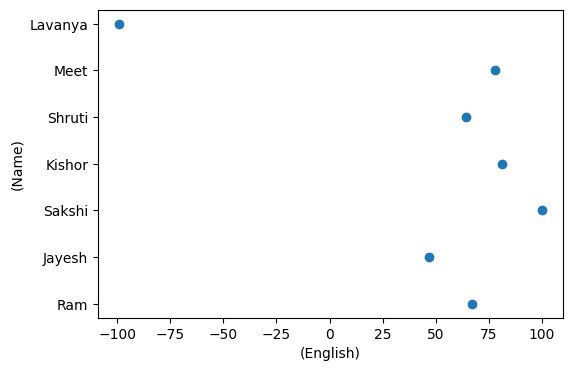

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
fig, ax2 = plt.subplots(figsize=(6,4))

ax.scatter(df['Hindi'], df['Name'])
ax.set_xlabel('(Hindi)')
ax.set_ylabel('(Name)')

ax2.scatter(df['English'], df['Name'])
ax2.set_xlabel('(English)')
ax2.set_ylabel('(Name)')

plt.show()

In [7]:
num_var= df.select_dtypes(include=['int64','float64']).columns
num_var

Index(['Age', 'Maths', 'English', 'Science', 'Hindi', 'Sanskrit', 'SST'], dtype='object')

In [8]:
for column in num_var:
    print('column: ',column)
    
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    
    lower_bound= q1-1.5*IQR
    higher_bound= q3+1.5*IQR
    outliers = df[(df[column]< lower_bound)|(df[column]> higher_bound)][column]
    print('outliers are: ',outliers,'\n')

column:  Age
outliers are:  Series([], Name: Age, dtype: int64) 

column:  Maths
outliers are:  Series([], Name: Maths, dtype: float64) 

column:  English
outliers are:  6   -99
Name: English, dtype: int64 

column:  Science
outliers are:  Series([], Name: Science, dtype: float64) 

column:  Hindi
outliers are:  2    400.0
Name: Hindi, dtype: float64 

column:  Sanskrit
outliers are:  Series([], Name: Sanskrit, dtype: float64) 

column:  SST
outliers are:  Series([], Name: SST, dtype: float64) 



In [9]:
upper_limit = 100
lower_limit = 0
print(upper_limit)
print(lower_limit)

100
0


In [10]:
df['Hindi'] = np.where(df['Hindi'] > upper_limit,
   upper_limit,
   np.where(
       df['Hindi'] < lower_limit,
       lower_limit,
       df['Hindi']
   )
)

In [11]:
df

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Ram,Yadav,Pune,20,76.000000,67,52.333333,64.0,46.000000,56.0
1,Jayesh,Patil,Pune,21,64.333333,47,75.000000,76.0,56.000000,47.0
2,Sakshi,joshi,Mumbai,19,87.000000,100,59.000000,100.0,65.333333,84.0
3,Kishor,Sharma,Delhi,18,45.000000,81,43.000000,58.0,89.000000,61.0
4,Shruti,Bhamre,Nashik,22,54.000000,64,35.000000,49.0,56.000000,78.0
5,Meet,Gunjal,Tokyo,21,57.000000,78,46.000000,79.0,98.000000,26.0
6,Lavanya,Joshi,Agra,22,67.000000,-99,56.000000,100.0,47.000000,75.0
